# Supervised Machine Learning: regression and its metrics
Regression in machine learning is a technique used for predicting continuous outcomes. In simple terms, it's like finding the best-fitting line through a scatter plot of data points. This line can then be used to predict future values. For example, if you want to predict the mileage of a car based on its features like weight, horsepower, and displacement, you could use regression. You would plot the average MPG of each car given its features, then use regression to find the relationship between MPG and the features. This relationship can then be used to predict the MPG of other cars based on their features.

---
## 1.&nbsp;Import libraries and files 💾
For this workshop, we'll be using the diamonds dataset from seaborn, which contains information on diamond prices and their attributes, such as carat, cut, color, and clarity.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config
import lazypredict

In [2]:
original_housing_df = pd.read_csv('housing_iteration_6_regression.csv')
original_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
original_housing_df.shape

(1460, 81)

In [4]:
original_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
original_housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---
## 3.&nbsp;Creating a dummy model 🤖

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


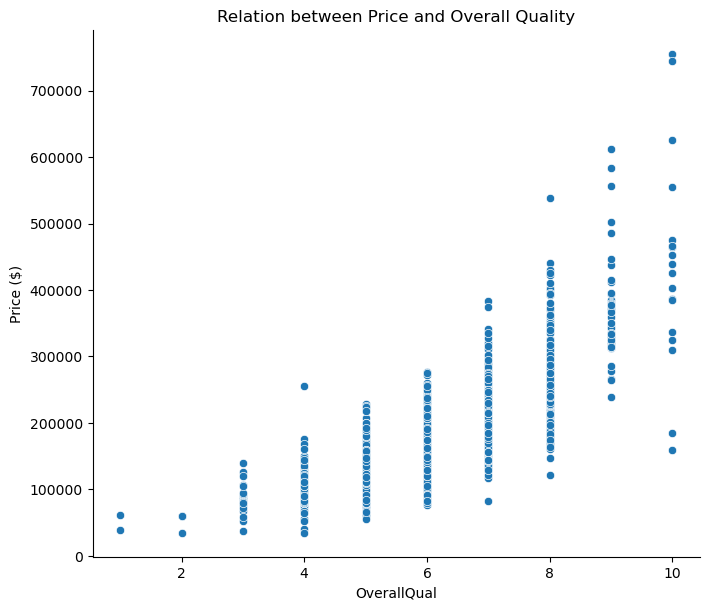

In [6]:
(
  sns.relplot(data=original_housing_df,
              x='OverallQual',
              y='SalePrice',
              height=6,
              aspect=1.2)
  .set(title='Relation between Price and Overall Quality')
  .set_axis_labels('OverallQual', 'Price ($)')
);

Looking at our plot of the relationship between Overall Quality and sale price, we can come up with a simple dummy model based on a linear relationship between the two variables. For example,

`SalePrice = 1/9*(380000 OverallQual + 142000)`

Let's plot a line on the chart

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


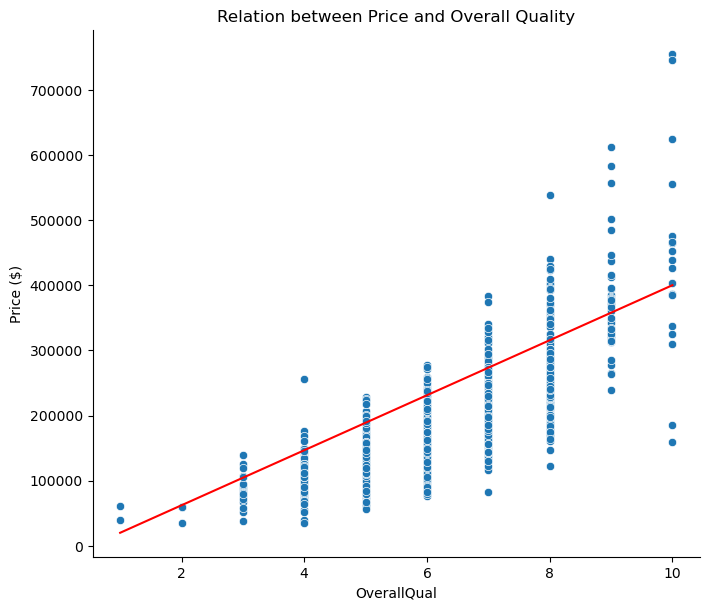

In [7]:
(
  sns.relplot(data=original_housing_df,
              x='OverallQual',
              y='SalePrice',
              height=6,
              aspect=1.2)
  .set(title='Relation between Price and Overall Quality')
  .set_axis_labels('OverallQual', 'Price ($)')
)
plt.plot([1, 10], [20000, 400000], 'r-')
plt.show();

This appears to be a decent fit for our dummy model. However, assessing its performance becomes a different challenge compared to classification tasks. In classification, we can easily determine how well our model performs by checking if it correctly predicts the categories. But with regression, where our predictions involve continuous values like prices, they don't fall into distinct categories. Hence, we must employ alternative techniques to evaluate the effectiveness of our regression model.

First, let's create our dummy model as a function so we can use it.

In [8]:
def dummy_model(OverallQual):
    return 1/9*(380000*OverallQual + 142000)

We will soon test our dummy model against SKLearns models, so lets perform a train test split. We'll compare all of the models on how well they perform on the test data.

In [9]:
X = original_housing_df.copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let's make predictions for the test set using our dummy model.

In [10]:
dummy_y_test_pred = dummy_model(X_test['OverallQual'])

Now that we have our predictions for the test set, we can evaluate how good (or bad) these predictions are.

---
## 4.&nbsp;Assessing a regression model with SKLearn 📈

Metrics serve as quantitative measures to evaluate the model's prediction accuracy compared to the actual target values. The choice of a metric depends on the specific regression task and data nature. Selecting the right metric beforehand is vital for guiding model development, tuning hyperparameters, and making decisions about feature engineering and model architecture. While it's recommended to have one primary evaluation metric as your main goal, examining multiple metrics provides valuable insights into the model's strengths and weaknesses. Here, we'll explore four common metrics to gain a better understanding of their calculations and meanings.

- For a comprehensive list of metrics, check [here](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics).
- To understand each regression metric and when to use them, refer to this [guide](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

### 4.1.&nbsp;Mean Absolute Error (MAE)
To calculate MAE, we first find the difference between the actual price and the predicted price for each row. Then, we take the absolute value of these differences (which means we ignore negative signs) and find the average of all these absolute differences.

Here's an example:

1. Actual price: 10.0, Predicted price: 8.5
2. Difference: 10.0 - 8.5 = 1.5
3. Absolute difference: |1.5| = 1.5

We repeat this process for all rows and find the average of the absolute differences. That's our Mean Absolute Error! The smaller the MAE, the better our model is at guessing the price.

In [11]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_mae

96684.66324200912

### 4.2.&nbsp;Root Mean Square Error
To calculate the Root Mean Squared Error (RMSE), we first find the difference between the actual and the predicted values for each data point. Then, we square these differences, which means we are making all the differences positive and giving more weight to larger differences. After squaring, we find the average of these squared differences and finally, take the square root of this average.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Squared difference: 1.5^2 = 2.25

We repeat this process for all rows, find the average of the squared differences, and take the square root of this average. The smaller the RMSE, the better our model is at predicting the price, with a greater penalty for larger errors as compared to the Mean Absolute Error (MAE).

In [12]:
from sklearn.metrics import mean_squared_error

dumb_rmse = mean_squared_error(y_true = y_test,
                               y_pred = dummy_y_test_pred,
                               squared=False)
dumb_rmse

104675.99895946163

### 4.3.&nbsp;Mean Absolute Percentage
To calculate the Mean Absolute Percentage Error (MAPE), we first find the difference between the actual and the predicted values for each data point. Then, we divide each of these differences by the actual value, which gives us the relative error. We take the absolute value of these relative errors to ignore negative signs and then calculate the average of these absolute percentage errors.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Relative error: 1.5 / 10.0 = 0.15
5. Absolute percentage error: |0.15| = 0.15 (15%)

We repeat this process for all rows and find the average of these absolute percentage errors. That's our Mean Absolute Percentage Error! The smaller the MAPE, the better our model is at predicting prices, with each error being a percentage of the actual value.

MAPE is a very intuitive measure because it directly tells us how far off our predictions are on average in terms of percentage. For example, a MAPE of 0.20 means that our predictions are, on average, 20% off from the actual prices. A lower MAPE indicates more accurate predictions.

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dummy_y_test_pred)
dumb_mape

0.6880202084864134

### 4.4.&nbsp;R Squared 🧮
R-squared, also referred to as the coefficient of determination, measures the proportion of variance in the y (target labels) that can be explained by the model's predictions based on X (the feature matrix). With R-squared values ranging from 0 to 1, higher scores indicate a better fit, suggesting that the model can more effectively capture the variations in the target labels based on the features provided.

In [14]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_test,
                   y_pred = dummy_y_test_pred)

dumb_r2

-0.4285004916602375

---
## 5.&nbsp;Creating a SKLearn model 🧠
SKLearn has a great [guide for models](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

First off, before we do anything with models, we'll set up a preprocessor.

In [15]:
# Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

X_cat = X_train.select_dtypes(exclude = 'number').copy()
X_num = X_train.select_dtypes(include = 'number').copy()

In [16]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

In [17]:
# defining ordinal & onehot columns
ordinal_cols = ['Street','CentralAir','Foundation','ExterQual', 
                'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'ExterQual', 'ExterCond', 
                'KitchenQual','FireplaceQu', 'LotShape', 'LandContour',
                'Utilities','LotConfig', 'LandSlope', 'BldgType',
                'HouseStyle','RoofStyle','RoofMatl' , 
                'MasVnrType', 'HeatingQC', 'Electrical',
                #'PoolQC'
                'Functional', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive']
onehot_cols = ['Heating', 'MSZoning','Condition1',
               'Neighborhood', 'Exterior1st', 'GarageType','SaleType']

In [18]:
street_cats = ['N_A', 'Grvl', 'Pave']
central_air_cats = ['N_A', 'N', 'Y']
foundation_cats = ['N_A', 'Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']
BsmtQual_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtCond_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtExposure_cat = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#BsmtFinType2_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cat = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_cat = ['N_A','NA','No','Mn','Av','Gd']
#Alley_cat = ['N_A','NA','Pave','Grvl']
LotShape_cat = ['N_A','IR3','IR2','IR1','Reg']
LandContour_cat = ['N_A','Low','HLS','Bnk','Lvl']
Utilities_cat = ['N_A','ELO','NoSeWa','NoSewr','AllPub']
LotConfig_cat = ['N_A','Inside','Corner','CulDSac','FR2','FR3']
LandSlope_cat = ['N_A','Sev','Mod','Gtl']
BldgType_cat = ['N_A','Twnhs','TwnhsE','Duplex','2fmCon','1Fam']
HouseStyle_cat = ['N_A','1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl']
RoofStyle_cat = ['N_A', 'Flat', 'Shed' , 'Gable' , 'Hip' , 'Gambrel' , 'Mansard' ]
RoofMatl_cat = ['N_A', 'Roll', 'Tar&Grv' , 'CompShg' , 'WdShngl' , 'WdShake' , 'Membran', 'Metal','ClyTile' ]
MasVnrType_cat = ['N_A','None','CBlock','BrkCmn', 'BrkFace', 'Stone']
HeatingQC_cat =  ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Electrical_cat = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
Functional_cat = ['N_A', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1','Typ']
GarageFinish_cat = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
GarageQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PavedDrive_cat = ['N_A', 'N', 'P', 'Y']
PoolQC_cat = ['N_A', 'NA', 'Fa', 'TA', 'Gd', 'Ex']

In [19]:
# defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[street_cats, central_air_cats,
                                                   foundation_cats, ExterQual_cat,
                                                   ExterCond_cat, BsmtQual_cat,
                                                   BsmtCond_cat, BsmtExposure_cat,
                                                   BsmtFinType1_cat,ExterQual_cat, 
                                                   ExterCond_cat, KitchenQual_cat, 
                                                   FireplaceQu_cat, 
                                                   LotShape_cat,
                                                   LandContour_cat, Utilities_cat, 
                                                   LotConfig_cat, LandSlope_cat, 
                                                   BldgType_cat, HouseStyle_cat,
                                                   RoofStyle_cat, RoofMatl_cat, 
                                                   MasVnrType_cat, 
                                                   HeatingQC_cat,
                                                   Electrical_cat, Functional_cat,
                                                  GarageFinish_cat, GarageQual_cat,
                                                   #PoolQC_cat,
                                                   GarageCond_cat, PavedDrive_cat]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", 
                                     sparse_output=False), onehot_cols),
    ]
)


In [20]:
#categorical pipeline = "N_A" imputer + categorical encoder
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

### 5.1.&nbsp;DecisionTreeRegressor

In [22]:
dt_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

Predicting with the DecisionTreeRegressor

In [23]:
dt_predictions = dt_pipeline.predict(X_test)

How well is the DecisionTreeRegressor performing? Let's compare the R-squared with our dummy model

In [24]:
dt_r2 = r2_score(y_true = y_test,
                 y_pred = dt_predictions)

pd.DataFrame({"R2": [dumb_r2, dt_r2]},
             index=["dumb_model", "decision_tree"])

,R2
dumb_model,-0.428500
decision_tree,0.761499


That's a big improvement! Let's see how a few other models perform.

### 5.2.&nbsp;SGDRegressor

In [25]:
sgd_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

### 5.3.&nbsp;LinearRegression

In [26]:
lr_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            LinearRegression())

lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)

In [43]:
lr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

---
## 6.&nbsp;Comparing our SKLearn models 🔍

In [27]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dumb_r2, dt_r2, sgd_r2, lr_r2]},
                                    index=["dumb_model", "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,R2
dumb_model,-0.428500
decision_tree,0.761499
sgd,0.837738
linear_regression,0.854009


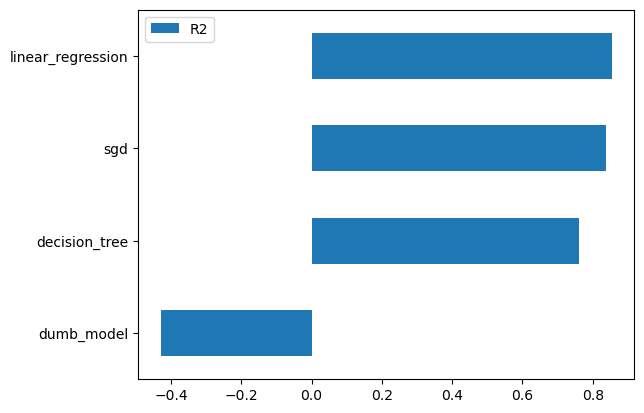

In [28]:
(
    comparing_models_df
    .sort_values(by='R2')
    .plot.barh()
);

Based on the R-squared scores provided, the Decision Tree model stands out as the best performer. A higher R-squared score indicates that the model can explain a larger proportion of the variance in the target labels (y) based on the features (X); meaning it can better capture the underlying relationships between the input features and the target labels, resulting in more accurate predictions.

---
## 6.&nbsp;Optimization using GridSearchCV🔍

### &nbsp; DecisionTreeRegressor with GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__criterion":["squared_error", "friedman_mse",
                                          "absolute_error", "poisson"],
    "decisiontreeregressor__splitter":["best", "random"],
    "decisiontreeregressor__min_samples_leaf": range(2, 10, 2),
    "decisiontreeregressor__min_samples_split": range(2, 10, 2)
}

search = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=10,
                      verbose=1)

In [40]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__min_samples_leaf': range(2, 10, 2),
                         'decisiontreeregressor__min_samples_split': range(2, 10, 2),
                         'decisiontreeregressor__splitter': ['best', 'random']},
             verbose=1)

In [41]:
dt_gridsearchcv_predictions = search.predict(X_test)

In [42]:
dt_gridsearchcv_r2 = r2_score(y_true = y_test,
                 y_pred = dt_gridsearchcv_predictions)

comparing_models_df = pd.DataFrame({"R2": [dumb_r2, dt_r2, sgd_r2, lr_r2,dt_gridsearchcv_r2 ]},
                                    index=["dumb_model", "decision_tree", 
                                           "sgd", "linear_regression", 
                                           "decision_tree with gridsearch_cv"])

comparing_models_df

,R2
dumb_model,-0.428500
decision_tree,0.761499
sgd,0.837738
linear_regression,0.854009
decision_tree with gridsearch_cv,0.820055


### &nbsp; LinearRegression with GridSearchCV

In [48]:
param_grid_lr = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "linearregression__fit_intercept":[1, 0],
   # "decisiontreeregressor__splitter":["best", "random"],
    #"decisiontreeregressor__min_samples_leaf": range(2, 10, 2),
    #"decisiontreeregressor__min_samples_split": range(2, 10, 2)
}

search_linear_reg = GridSearchCV(lr_pipeline,
                      param_grid_lr,
                      cv=10,
                      verbose=1)

In [49]:
search_linear_reg.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/s

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'linearregression__fit_intercept': [1, 0]},
             verbose=1)

In [52]:
lr_gridsearchcv_predictions = search_linear_reg.predict(X_test)

In [53]:
lr_gridsearchcv_r2 = r2_score(y_true = y_test,
                 y_pred = lr_gridsearchcv_predictions)

comparing_models_df = pd.DataFrame({"R2": [dumb_r2, dt_r2, sgd_r2, lr_r2,
                                           dt_gridsearchcv_r2, lr_gridsearchcv_r2]},
                                    index=["dumb_model", "decision_tree", 
                                           "sgd", "linear_regression", 
                                           "decision_tree with gridsearch_cv",
                                           "Linear_Regression with gridsearch_cv"])

comparing_models_df

,R2
dumb_model,-0.428500
decision_tree,0.761499
sgd,0.837738
linear_regression,0.854009
decision_tree with gridsearch_cv,0.820055
Linear_Regression with gridsearch_cv,0.854009
